<a href="https://colab.research.google.com/github/YLiu95/Loan_default_classification_Llodys_Banking_Group_challenge/blob/main/Lloyds_data_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lloyds data challenge

### import libraries

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot

## data prepration

### import data. data shape: (18,324 ,31)

In [ ]:
url = 'https://raw.githubusercontent.com/YLiu95/Loan_default_classification_Llodys_Banking_Group_challenge/main/LBG%20Step%20Up%20Data%20Set%20csv.csv'
df = pd.read_csv(url)
df

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3 years,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36 months,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,TX,97500.0,1 year,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60 months,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,NY,120000.0,1 year,Senior manager,RENT,806.57,25000,credit_card,36 months,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,CA,130000.0,10+ years,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36 months,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,TX,58296.0,10+ years,Account Manager,MORTGAGE,41.79,1200,other,36 months,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,67809746,NY,300000.0,5 years,Director,MORTGAGE,164.22,5000,credit_card,36 months,...,22.0,8.0,0.0,3.0,15,83.3,0,46,319418.0,Fully Paid
18320,66360297,IL,120000.0,9 years,Journalist,MORTGAGE,455.96,14000,debt_consolidation,36 months,...,22.0,9.0,0.0,4.0,22,25.0,0,38,63774.0,Fully Paid
18321,59699673,TX,85000.0,10+ years,Process Operator,MORTGAGE,390.36,11925,credit_card,36 months,...,10.0,14.0,0.0,2.0,17,71.4,0,31,72686.0,Fully Paid
18322,83334760,CA,22000.0,3 years,Instructional Specialist/Applications,RENT,213.89,6000,debt_consolidation,36 months,...,1.0,6.0,0.0,0.0,6,66.7,0,13,5058.0,Fully Paid


### delete all categorical data. data shape: (18,324 ,25)

In [ ]:
df_num = df.drop(['addr_state', 'emp_length', 'emp_title',
                  'home_ownership', 'purpose', 'term',], axis=1)
df_num

,id,annual_inc,installment,loan_amnt,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,72000.0,395.66,12000,11.49%,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,97500.0,966.47,35000,21.99%,7019.0,NaN,NaN,148.0,170.0,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,120000.0,806.57,25000,9.99%,4891.0,NaN,NaN,128.0,147.0,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,130000.0,846.17,25225,12.69%,17619.0,NaN,NaN,130.0,172.0,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,58296.0,41.79,1200,15.31%,12321.0,1.0,10372.0,167.0,145.0,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,67809746,300000.0,164.22,5000,11.22%,67491.0,0.0,23081.0,127.0,200.0,...,22.0,8.0,0.0,3.0,15,83.3,0,46,319418.0,Fully Paid
18320,66360297,120000.0,455.96,14000,10.64%,15445.0,NaN,NaN,208.0,145.0,...,22.0,9.0,0.0,4.0,22,25.0,0,38,63774.0,Fully Paid
18321,59699673,85000.0,390.36,11925,10.99%,21682.0,NaN,NaN,164.0,365.0,...,10.0,14.0,0.0,2.0,17,71.4,0,31,72686.0,Fully Paid
18322,83334760,22000.0,213.89,6000,16.99%,843.0,3.0,2539.0,99.0,130.0,...,1.0,6.0,0.0,0.0,6,66.7,0,13,5058.0,Fully Paid


### comprehensive solution for missing & imbalanced data. data shape: (7812, 24)

creatively and comprehensively solve the problem of missing data and imbalanced data at the same time.

delete enough missing data in the majority class so that it has the same amount of data with the minority class.

Finally, fill the rest of the missing values with 0.

In [ ]:
x = 14111
df_num[df_num['loan_status'] == 'Fully Paid'][:x].dropna().append(df_num[df_num['loan_status'] == 'Fully Paid'][x:]).shape

(3906, 25)

In [ ]:
df_repay = df_num[df_num['loan_status'] == 'Fully Paid'][:x].dropna().append(df_num[df_num['loan_status'] == 'Fully Paid'][x:])
df_repay.shape

(3906, 25)

In [ ]:
df_repay = df_repay.fillna(0)
df_repay

,id,annual_inc,installment,loan_amnt,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
10,96352348,81000.0,503.16,16000,8.24%,12658.0,4.0,12203.0,207.0,202.0,...,36.0,11.0,0.0,2.0,18,71.4,0,66,131604.0,Fully Paid
13,113009795,53100.0,162.73,4900,11.99%,3150.0,2.0,1990.0,81.0,66.0,...,16.0,5.0,0.0,6.0,20,100.0,0,22,62991.0,Fully Paid
15,130793408,120000.0,578.62,19000,6.07%,30956.0,3.0,6440.0,162.0,268.0,...,13.0,6.0,0.0,1.0,13,0.0,0,32,70490.0,Fully Paid
17,71955425,60000.0,170.09,5000,13.67%,2837.0,4.0,1040.0,108.0,156.0,...,11.0,5.0,2.0,3.0,7,50.0,0,30,19861.0,Fully Paid
20,115148149,195000.0,389.58,12000,10.42%,4006.0,2.0,10639.0,142.0,384.0,...,7.0,10.0,0.0,2.0,11,0.0,0,30,40057.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,67809746,300000.0,164.22,5000,11.22%,67491.0,0.0,23081.0,127.0,200.0,...,22.0,8.0,0.0,3.0,15,83.3,0,46,319418.0,Fully Paid
18320,66360297,120000.0,455.96,14000,10.64%,15445.0,0.0,0.0,208.0,145.0,...,22.0,9.0,0.0,4.0,22,25.0,0,38,63774.0,Fully Paid
18321,59699673,85000.0,390.36,11925,10.99%,21682.0,0.0,0.0,164.0,365.0,...,10.0,14.0,0.0,2.0,17,71.4,0,31,72686.0,Fully Paid
18322,83334760,22000.0,213.89,6000,16.99%,843.0,3.0,2539.0,99.0,130.0,...,1.0,6.0,0.0,0.0,6,66.7,0,13,5058.0,Fully Paid


In [ ]:
df_num[df_num['loan_status'] != 'Fully Paid'].shape

(3906, 25)

In [ ]:
df_default = df_num[df_num['loan_status'] != 'Fully Paid'].fillna(0)
df_default.shape

(3906, 25)

In [ ]:
df_default

,id,annual_inc,installment,loan_amnt,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
5,46733394,87000.0,629.47,24000,19.52%,5896.0,0.0,0.0,354.0,100.0,...,12.0,19.0,0.0,6.0,24,77.8,0,42,50912.0,Charged Off
16,56102664,60000.0,69.93,2000,15.61%,2301.0,0.0,0.0,125.0,234.0,...,10.0,18.0,0.0,10.0,20,20.0,1,46,41412.0,Charged Off
19,9154741,11424.0,114.59,3250,16.20%,587.0,0.0,0.0,67.0,74.0,...,3.0,11.0,0.0,2.0,11,20.0,0,18,6454.0,Charged Off
23,134730577,116000.0,544.19,25000,11.05%,9456.0,7.0,23162.0,197.0,151.0,...,15.0,20.0,0.0,1.0,22,30.8,0,47,114922.0,Charged Off
27,45354936,110000.0,496.83,22575,11.53%,4190.0,0.0,0.0,183.0,167.0,...,33.0,8.0,0.0,1.0,22,100.0,0,51,92188.0,Charged Off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,44142669,30600.0,301.07,10975,21.67%,3170.0,0.0,0.0,83.0,80.0,...,5.0,9.0,0.0,1.0,11,50.0,0,15,31697.0,Charged Off
18308,15450139,98500.0,205.54,6000,14.16%,6981.0,0.0,0.0,258.0,119.0,...,3.0,5.0,0.0,1.0,7,100.0,0,21,48866.0,Charged Off
18309,85590438,72000.0,551.89,13975,24.49%,17302.0,5.0,633.0,81.0,69.0,...,7.0,6.0,0.0,6.0,10,33.3,0,16,36693.0,Charged Off
18313,42504811,85000.0,659.81,20000,11.53%,14367.0,0.0,0.0,108.0,108.0,...,13.0,6.0,0.0,2.0,12,25.0,0,30,43072.0,Charged Off


In [ ]:
df_final = df_repay.append(df_default).sample(frac=1).drop(['id'], axis=1)
df_final

,annual_inc,installment,loan_amnt,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
16269,137749.0,368.08,16000,13.49%,15116.0,1.0,39.0,167.0,297.0,13.0,...,27.0,4.0,1.0,1.0,17,0.0,0,43,137994.0,Charged Off
17893,240000.0,1318.63,35000,21.00%,7483.0,0.0,0.0,85.0,194.0,20.0,...,10.0,8.0,1.0,1.0,12,0.0,0,29,82316.0,Charged Off
12575,82000.0,270.88,10400,19.19%,9917.0,0.0,0.0,144.0,353.0,2.0,...,9.0,14.0,2.0,6.0,18,66.7,1,35,34990.0,Charged Off
6399,40000.0,600.06,17475,14.33%,3183.0,0.0,0.0,107.0,112.0,6.0,...,9.0,8.0,0.0,3.0,10,0.0,1,23,31828.0,Charged Off
12209,185000.0,756.92,24700,6.49%,9509.0,4.0,2225.0,249.0,322.0,46.0,...,5.0,2.0,0.0,0.0,3,0.0,0,15,28527.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,50000.0,488.17,19600,17.10%,6365.0,0.0,0.0,146.0,137.0,15.0,...,26.0,7.0,0.0,0.0,14,25.0,0,41,82739.0,Charged Off
16876,70000.0,309.87,10000,7.24%,9526.0,0.0,3904.0,103.0,82.0,9.0,...,5.0,8.0,0.0,1.0,11,20.0,0,17,104789.0,Fully Paid
13960,44000.0,339.31,10000,13.49%,1980.0,1.0,3153.0,36.0,98.0,1.0,...,1.0,9.0,0.0,1.0,10,60.0,0,12,19804.0,Charged Off
15867,32000.0,97.50,3000,10.49%,3916.0,1.0,2074.0,115.0,22.0,8.0,...,8.0,3.0,0.0,1.0,6,33.3,0,11,23494.0,Charged Off


### convert to float

In [ ]:
df_final.dtypes

annual_inc                float64
installment               float64
loan_amnt                   int64
int_rate                   object
avg_cur_bal               float64
inq_last_12m              float64
max_bal_bc                float64
mo_sin_old_il_acct        float64
mo_sin_old_rev_tl_op      float64
mo_sin_rcnt_rev_tl_op     float64
mo_sin_rcnt_tl            float64
mort_acc                  float64
mths_since_last_delinq    float64
num_bc_tl                 float64
num_il_tl                 float64
num_op_rev_tl             float64
num_tl_90g_dpd_24m        float64
num_tl_op_past_12m        float64
open_acc                    int64
percent_bc_gt_75          float64
pub_rec_bankruptcies        int64
total_acc                   int64
total_bal_ex_mort         float64
loan_status                object
dtype: object

In [ ]:
df_final['int_rate'] = df_final['int_rate'].map(lambda x: x.rstrip('%'))
df_final['int_rate'] = df_final['int_rate'].astype(float)
df_final.dtypes

annual_inc                float64
installment               float64
loan_amnt                   int64
int_rate                  float64
avg_cur_bal               float64
inq_last_12m              float64
max_bal_bc                float64
mo_sin_old_il_acct        float64
mo_sin_old_rev_tl_op      float64
mo_sin_rcnt_rev_tl_op     float64
mo_sin_rcnt_tl            float64
mort_acc                  float64
mths_since_last_delinq    float64
num_bc_tl                 float64
num_il_tl                 float64
num_op_rev_tl             float64
num_tl_90g_dpd_24m        float64
num_tl_op_past_12m        float64
open_acc                    int64
percent_bc_gt_75          float64
pub_rec_bankruptcies        int64
total_acc                   int64
total_bal_ex_mort         float64
loan_status                object
dtype: object

In [ ]:
df_final

,annual_inc,installment,loan_amnt,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
16269,137749.0,368.08,16000,13.49,15116.0,1.0,39.0,167.0,297.0,13.0,...,27.0,4.0,1.0,1.0,17,0.0,0,43,137994.0,Charged Off
17893,240000.0,1318.63,35000,21.00,7483.0,0.0,0.0,85.0,194.0,20.0,...,10.0,8.0,1.0,1.0,12,0.0,0,29,82316.0,Charged Off
12575,82000.0,270.88,10400,19.19,9917.0,0.0,0.0,144.0,353.0,2.0,...,9.0,14.0,2.0,6.0,18,66.7,1,35,34990.0,Charged Off
6399,40000.0,600.06,17475,14.33,3183.0,0.0,0.0,107.0,112.0,6.0,...,9.0,8.0,0.0,3.0,10,0.0,1,23,31828.0,Charged Off
12209,185000.0,756.92,24700,6.49,9509.0,4.0,2225.0,249.0,322.0,46.0,...,5.0,2.0,0.0,0.0,3,0.0,0,15,28527.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,50000.0,488.17,19600,17.10,6365.0,0.0,0.0,146.0,137.0,15.0,...,26.0,7.0,0.0,0.0,14,25.0,0,41,82739.0,Charged Off
16876,70000.0,309.87,10000,7.24,9526.0,0.0,3904.0,103.0,82.0,9.0,...,5.0,8.0,0.0,1.0,11,20.0,0,17,104789.0,Fully Paid
13960,44000.0,339.31,10000,13.49,1980.0,1.0,3153.0,36.0,98.0,1.0,...,1.0,9.0,0.0,1.0,10,60.0,0,12,19804.0,Charged Off
15867,32000.0,97.50,3000,10.49,3916.0,1.0,2074.0,115.0,22.0,8.0,...,8.0,3.0,0.0,1.0,6,33.3,0,11,23494.0,Charged Off


### create input shape: (7812, 23) and labels

In [ ]:
dataset = df_final.values
dataset

array([[137749.0, 368.08, 16000, ..., 43, 137994.0, 'Charged Off'],
       [240000.0, 1318.63, 35000, ..., 29, 82316.0, 'Charged Off'],
       [82000.0, 270.88, 10400, ..., 35, 34990.0, 'Charged Off'],
       ...,
       [44000.0, 339.31, 10000, ..., 12, 19804.0, 'Charged Off'],
       [32000.0, 97.5, 3000, ..., 11, 23494.0, 'Charged Off'],
       [68000.0, 427.78, 12000, ..., 22, 41875.0, 'Charged Off']],
      dtype=object)

In [ ]:
# split into input (X) and output (Y) variables
X = dataset[:,0:23].astype(float)
X

array([[1.37749e+05, 3.68080e+02, 1.60000e+04, ..., 0.00000e+00,
        4.30000e+01, 1.37994e+05],
       [2.40000e+05, 1.31863e+03, 3.50000e+04, ..., 0.00000e+00,
        2.90000e+01, 8.23160e+04],
       [8.20000e+04, 2.70880e+02, 1.04000e+04, ..., 1.00000e+00,
        3.50000e+01, 3.49900e+04],
       ...,
       [4.40000e+04, 3.39310e+02, 1.00000e+04, ..., 0.00000e+00,
        1.20000e+01, 1.98040e+04],
       [3.20000e+04, 9.75000e+01, 3.00000e+03, ..., 0.00000e+00,
        1.10000e+01, 2.34940e+04],
       [6.80000e+04, 4.27780e+02, 1.20000e+04, ..., 0.00000e+00,
        2.20000e+01, 4.18750e+04]])

In [ ]:
X.shape

(7812, 23)

In [ ]:
Y = dataset[:,23]
Y

array(['Charged Off', 'Charged Off', 'Charged Off', ..., 'Charged Off',
       'Charged Off', 'Charged Off'], dtype=object)

In [ ]:
Y.shape

(7812,)

#### label encoding

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
y = encoder.transform(Y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# summarize class distribution
print(Counter(y))

Counter({0: 3906, 1: 3906})


## classification

### baseline model defination. acc(std): 80.48% (1.41%), 30 min 70 epochs

- **evaluation method:** stratified k-fold cross validation
    > **stratified**, meaning that it will look at the output values and attempt to balance the number of instances that belong to each class in the k-splits of the data.

- **weight initialisation:** The weights are initialized using a small Gaussian random number

- **activation:** ReLU, sigmoid

- **loss:** logarithmic loss function (binary_crossentropy)

- Optimisation: Adam

In [ ]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(23,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
	return model

### training & evaluation with standardised data

standardised data has mean 0 and std 1

this preserves Gaussian and Gaussian-like distributions while normalizing the central tendencies for each attribute

In [ ]:
# evaluate baseline model with standardized dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_baseline, 
                                            epochs=70, batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    results = cross_val_score(pipeline, X, y, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

accuracy: 80.48% (1.41%)
CPU times: user 29min 56s, sys: 2min 48s, total: 32min 45s
Wall time: 30min 4s


### smaller model. acc(std) 80.66% (0.76%), 20 min 50 epochs

In [ ]:
# smaller model
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(30, input_shape=(23,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
	              metrics=['accuracy'])
	return model

In [ ]:
# evaluate smaller model with standardised dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_smaller, 
                                              epochs=50, batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    results = cross_val_score(pipeline, X, y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 80.66% (0.76%)
CPU times: user 21min 25s, sys: 1min 58s, total: 23min 24s
Wall time: 19min 59s


### bigger model. acc(std) 77.97% (1.06%), 20 min 50 epochs

In [ ]:
# larger model
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(23,), activation='relu'))
	model.add(Dense(30, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
	              metrics=['accuracy'])
	return model

In [ ]:
# evaluate bigger model with standardised dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_larger, epochs=50, 
                                            batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 77.97% (1.06%)
CPU times: user 22min 56s, sys: 1min 56s, total: 24min 53s
Wall time: 22min 12s


## feature selection

In [ ]:
# standardise input
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_std, y)

LogisticRegression()

Feature: 2, Score: -1.14343
Feature: 3, Score: -0.54087
Feature: 17, Score: -0.21639
Feature: 13, Score: -0.17980
Feature: 20, Score: -0.16919
Feature: 19, Score: -0.15752
Feature: 22, Score: -0.10097
Feature: 18, Score: -0.01933
Feature: 9, Score: -0.01352
Feature: 10, Score: 0.02256
Feature: 14, Score: 0.05577
Feature: 11, Score: 0.08128
Feature: 15, Score: 0.08549
Feature: 21, Score: 0.09141
Feature: 0, Score: 0.10345
Feature: 8, Score: 0.11972
Feature: 7, Score: 0.14978
Feature: 16, Score: 0.18696
Feature: 4, Score: 0.19053
Feature: 5, Score: 0.35510
Feature: 6, Score: 0.59155
Feature: 12, Score: 0.74612
Feature: 1, Score: 0.75087


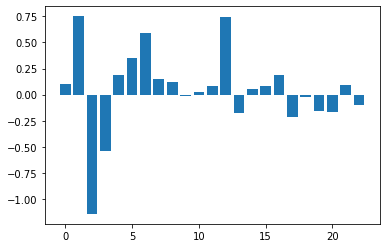

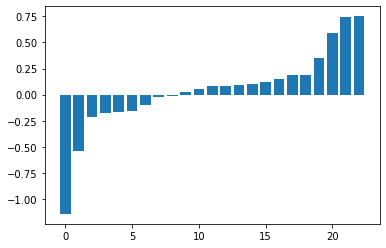

In [ ]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in sorted((enumerate(importance)), key = lambda x: x[1]):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
# plot sorted feature importance
pyplot.bar([x for x in range(len(importance))], sorted(importance))
pyplot.show()

#### selected feature: 2,3,17,13, 1,12,6,5. data shape: (7812, 8)

In [ ]:
X_fs = X[:, [2,3,17,13,1,12,6,5]]
X_fs.shape

(7812, 8)

### redefine model. acc(std) 82.37% (0.98%), 20 min 50 epochs

In [ ]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(30, input_shape=(8,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
	return model

In [ ]:
# evaluate smaller model with standardised dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_baseline, 
                                              epochs=50, batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    results = cross_val_score(pipeline, X_fs, y, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

accuracy: 82.37% (0.98%)
CPU times: user 22min 40s, sys: 2min 3s, total: 24min 43s
Wall time: 20min 5s


### smaller model. acc(std) 82.19% (1.17%), 20 min 50 epochs 

In [ ]:
# baseline model
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(15, input_shape=(8,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
	return model

In [ ]:
# evaluate smaller model with standardised dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_smaller, 
                                              epochs=50, batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    results = cross_val_score(pipeline, X_fs, y, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

accuracy: 82.19% (1.17%)
CPU times: user 22min 39s, sys: 2min 4s, total: 24min 43s
Wall time: 21min 7s


### bigger model. acc(std) 82.10% (1.29%), 20 min 50 epochs

In [ ]:
# larger model
def create_bigger():
	# create model
	model = Sequential()
	model.add(Dense(30, input_shape=(8,), activation='relu'))
	model.add(Dense(15, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', 
	              metrics=['accuracy'])
	return model

In [ ]:
# evaluate smaller model with standardised dataset
%%time
with tf.device('GPU'):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(model=create_bigger, 
                                              epochs=50, batch_size=7, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    results = cross_val_score(pipeline, X_fs, y, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

accuracy: 82.10% (1.29%)
CPU times: user 23min 44s, sys: 2min 2s, total: 25min 47s
Wall time: 21min 7s


## Best model acc 82.37%

# Bottom of this document